# Datacollection

## Context

This file will import some data and run EDA given an array of tickers

In [106]:
#COMMON
import pandas as pd #standard https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe
import numpy as np #standard https://numpy.org/doc/stable/user/index.html#user
import datetime #date and time stuff https://docs.python.org/3/library/datetime.html

#EDA
import sweetviz as sw #1-line EDA https://pypi.org/project/sweetviz/

#VIZ
import matplotlib.pyplot as plt #graphing/viz https://matplotlib.org/stable/index.html
import plotly.express as px #graphing/viz https://plotly.com/python-api-reference/plotly.express.html
%matplotlib inline
import seaborn as sns #graphing/viz https://seaborn.pydata.org/
import altair as alt #graphing/viz https://altair-viz.github.io/

#FINANCE
import pandas_datareader.data as web #remote data access https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
import pandas_datareader as pdr #remote data access https://pandas-datareader.readthedocs.io/en/latest/
import ffn #financial functions https://pmorissette.github.io/ffn/#
import yfinance as yf #yahoo finance api https://python-yahoofinance.readthedocs.io/en/latest/api.html

#TIMESERIES

#ML


## Access data, view, and do some house cleaning

### Get stock

In [107]:
stock = 'MSFT'
timeframe = '5y'

stock = yf.Ticker(stock).history(period=timeframe)
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-16 00:00:00-05:00,84.848517,85.498303,82.880336,83.200516,36599700,0.0,0.0
2018-01-17 00:00:00-05:00,83.887962,85.018017,83.577194,84.886177,25621200,0.0,0.0
2018-01-18 00:00:00-05:00,84.565993,85.385280,84.434153,84.848503,24159700,0.0,0.0
2018-01-19 00:00:00-05:00,84.886165,85.328772,84.434146,84.754326,36875000,0.0,0.0
2018-01-22 00:00:00-05:00,84.754316,86.279896,84.509468,86.270477,23601600,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-09 00:00:00-05:00,226.449997,231.240005,226.410004,227.119995,27369800,0.0,0.0
2023-01-10 00:00:00-05:00,227.759995,231.309998,227.330002,228.850006,27033900,0.0,0.0
2023-01-11 00:00:00-05:00,231.289993,235.949997,231.110001,235.770004,28669300,0.0,0.0


### Removing unnecessary data in the datetimes index

In [108]:
stock.index

DatetimeIndex(['2018-01-16 00:00:00-05:00', '2018-01-17 00:00:00-05:00',
               '2018-01-18 00:00:00-05:00', '2018-01-19 00:00:00-05:00',
               '2018-01-22 00:00:00-05:00', '2018-01-23 00:00:00-05:00',
               '2018-01-24 00:00:00-05:00', '2018-01-25 00:00:00-05:00',
               '2018-01-26 00:00:00-05:00', '2018-01-29 00:00:00-05:00',
               ...
               '2022-12-30 00:00:00-05:00', '2023-01-03 00:00:00-05:00',
               '2023-01-04 00:00:00-05:00', '2023-01-05 00:00:00-05:00',
               '2023-01-06 00:00:00-05:00', '2023-01-09 00:00:00-05:00',
               '2023-01-10 00:00:00-05:00', '2023-01-11 00:00:00-05:00',
               '2023-01-12 00:00:00-05:00', '2023-01-13 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1259, freq=None)

In [109]:
stock.index = stock.index.strftime('%Y-%m-%d')

In [110]:
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-16,84.848517,85.498303,82.880336,83.200516,36599700,0.0,0.0
2018-01-17,83.887962,85.018017,83.577194,84.886177,25621200,0.0,0.0
2018-01-18,84.565993,85.385280,84.434153,84.848503,24159700,0.0,0.0
2018-01-19,84.886165,85.328772,84.434146,84.754326,36875000,0.0,0.0
2018-01-22,84.754316,86.279896,84.509468,86.270477,23601600,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-09,226.449997,231.240005,226.410004,227.119995,27369800,0.0,0.0
2023-01-10,227.759995,231.309998,227.330002,228.850006,27033900,0.0,0.0
2023-01-11,231.289993,235.949997,231.110001,235.770004,28669300,0.0,0.0


### See if close is actually adj. close (adjusted for dividends and stock splits)

from yahoo finance we can see that on the 16th of November 2022, there was a dividend. i.e., adj. close and close deviate before that date. the data show that the number should be equal to 241.29, let's check

In [111]:
rows = stock.loc['2022-11-15']
print(rows)

Open            2.449696e+02
High            2.463059e+02
Low             2.393555e+02
Close           2.412900e+02
Volume          3.139010e+07
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2022-11-15, dtype: float64


the number is correct - so we can use the close column as an actual price that is adjusted for dividends and splits etc.

## Central Limit Theorem & Descriptive Statistics

### Extract only the close price from stock

In [112]:
prices = stock['Close']
prices

Date
2018-01-16     83.200516
2018-01-17     84.886177
2018-01-18     84.848503
2018-01-19     84.754326
2018-01-22     86.270477
                 ...    
2023-01-09    227.119995
2023-01-10    228.850006
2023-01-11    235.770004
2023-01-12    238.509995
2023-01-13    239.229996
Name: Close, Length: 1259, dtype: float64

### Summary statistics - note these are not very valuable untill further EDA is done!

In [113]:
prices.describe()

count    1259.000000
mean      191.199874
std        75.062536
min        80.055176
25%       116.415138
50%       198.814697
75%       253.122589
max       339.924835
Name: Close, dtype: float64

Find sample mean

In [114]:
prices.mean()

191.19987387804875

Find median

In [115]:
prices.median()

198.814697265625

Find mode

In [116]:
prices.mode()

0      89.883179
1      95.841164
2      98.484169
3     101.265617
4     101.578560
5     101.942902
6     104.518417
7     106.559746
8     131.591827
9     133.241165
10    133.822464
11    134.131546
12    134.771988
13    153.031235
14    203.575378
15    215.248322
16    233.581741
17    241.439575
18    252.829330
19    291.579407
20    297.333191
Name: Close, dtype: float64

#### Create histogram of returns

calculate returns

In [117]:
prices_return=prices.pct_change(1)
prices_return

Date
2018-01-16         NaN
2018-01-17    0.020260
2018-01-18   -0.000444
2018-01-19   -0.001110
2018-01-22    0.017889
                ...   
2023-01-09    0.009736
2023-01-10    0.007617
2023-01-11    0.030238
2023-01-12    0.011621
2023-01-13    0.003019
Name: Close, Length: 1259, dtype: float64

In [118]:
prices_return.describe()

count    1258.000000
mean        0.001032
std         0.019619
min        -0.147390
25%        -0.008360
50%         0.001289
75%         0.010958
max         0.142169
Name: Close, dtype: float64

Create histogram - we use Sturge's rule for # of bins

In [119]:
sturge = round(1+3.22*np.log(prices.shape[0]),1)
sturge

24.0

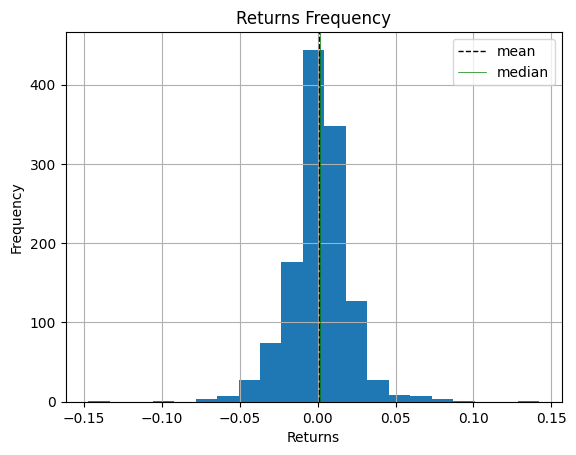

In [120]:
prices_return.hist(bins=21);
_ = plt.xlabel('Returns')
_ = plt.ylabel('Frequency')
_ = plt.title('Returns Frequency')
_ = plt.axvline(prices_return.mean(), color='k', linestyle='dashed', linewidth=1, label ='mean')
_ = plt.axvline(prices_return.median(), color='g', linewidth=0.5,label='median')
plt.legend();

#### Create box plot of close price

<AxesSubplot: xlabel='Close'>

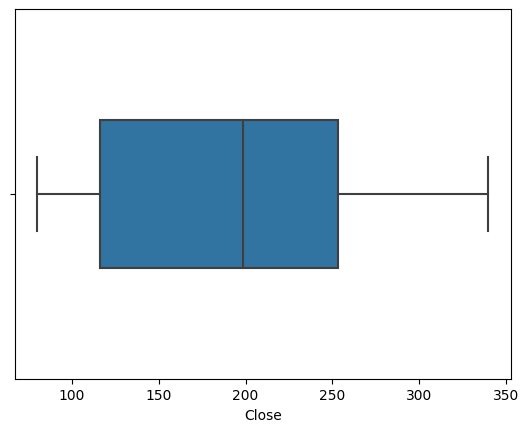

In [121]:
sns.boxplot(x=prices, width = 0.4)

#### Skew and kurtosis

Skew: Skewness is a valuable metric for determining the absence of symmetry since it is crucial to comprehend symmetry. When discussing skewness, it is possible for the information to be skewed to the left, to the right, or to the centre.

In [122]:
skew = prices_return.skew()
print(skew)
if skew > 0:
    print("returns are skewed to the right")
else:
    print("returns are skewed to the left")

-0.024702868759312286
returns are skewed to the left


Kurtosis: Kurtosis is the measure of the tails in a normal distribution. A high kurtosis is related to having heavy tails, which means outliers. A low kurtosis means lack of outliers which is light tails. It is uncommon to have a uniform distribution.

There are three options of kurtosis for interpreting the result.

- Leptokurtic: the value of kurtosis is greater than (>) than zero. The interpretation is that the data is centered around the mean.

- Mesokurtic: the value of the kurtosis is equal (=) to zero. This represents a normal distribution

- Platykurtic: the value of the kurtosis is less than zero.The interpretation is that the data is far from the mean

In [123]:
kurt = prices_return.kurtosis()
print(kurt)
if kurt > 0:
    print("returns are centered around the mean")
if kurt == 0:
    print("returns are normally distributed")
if kurt < 0:
    print("returns are far from the mean")

6.636910039426098
returns are centered around the mean
